# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I **Team_CB4_JHB**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Our company has been awarded the task to:

- 1. Analyse the supplied data;
- 2. Identify potential errors in the data and clean the existing data set;
- 3. Determine if additional features can be added to enrich the data set;
- 4. Build a model that is able to classify if a person believes in climate change;
- 5. Evaluate the accuracy of the best machine learning model;
- 6. Determine what features were most important in the model's prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

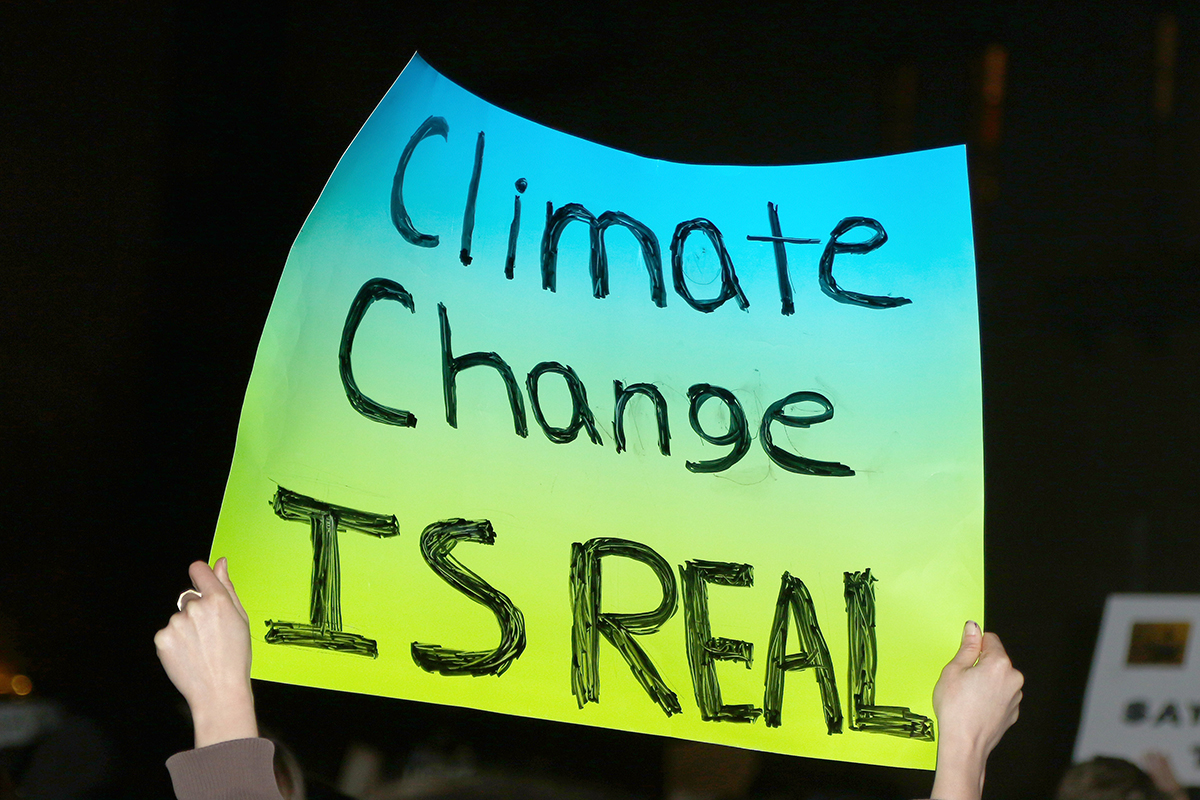

### Team Members
- Siyanda Madlopha
- Morglin Olivier
- Marcus Mohlake
- Theophilus Sdinani
- Angela Morris

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#two>3. Data Cleaning</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Feature Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data loading, data manipulation and data visulisation.
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pickle
%matplotlib inline
# Regular Expressions Library
import re 
pd.set_option("display.max_colwidth", 200)
# For text manipulation 
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *
# Vectorizing text into numerical dtype libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
# Libraries for data preparation, model building and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
#Version Control
from comet_ml import Experiment
print('All Libraries imported Successfully')

All Libraries imported Successfully


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [2]:
# Load the data.
df_train = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Advanced-Classification/Data/main/test_with_no_labels.csv')

<a id="two"></a>
## 3. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 3.1 Extration
Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable
by a classifier.The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict.
It yields better results than applying machine learning directly to the raw data.

In order to do this the following were carried out:
- Converting all of the words to lower case for consistency.
- Removal of punctuation (” “) and special characters from each sentence in the predictor variable.
- Removal of common English stop words. Stop words are words whose presence do not alter the meaning of a sentence.
- Eliminating all one-lettered words e.g a, I.
- Tokenizing is breaking the raw text into small chunks, tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.
- Stemming is the process of producing morphological variants of a root/base word.

####  “ Whatever you do to the left-hand side, you do to the Right-hand side”.

In [3]:
# Viewing first 5 rows of our df_train data.
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [4]:
# Viewing first 5 rows of our df_test data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [5]:
# Converting everything to lowercase.
df_train['message'] = df_train['message'].str.lower()

#### “ Whatever you do to the left-hand side, you do to the Right-hand side”.

In [6]:
# Converting the test data to lowercase.
df_test['message'] = df_test['message'].str.lower()

In [7]:
# We then view the changes made to our data.
df_train.head()

,sentiment,message,tweetid
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable",625221
1,1,it's not like we lack evidence of anthropogenic global warming,126103
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change https://t.co/44wotxtlcd,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954


In [8]:
# Function for removing @.
def remove_char(input_text, characters):
    regularEx = re.findall(characters, input_text)
    for i in regularEx:
        input_text = re.sub(i,' ',input_text)
        return input_text

In [9]:
# Applying the function of removing the @ character in our df_train data.
df_train['Initial_message'] = np.vectorize(remove_char)(df_train['message'],'@[\w]*')

In [10]:
# Applying the function of removing the @ character in our test data.
df_test['Initial_message'] = np.vectorize(remove_char)(df_test['message'],'@[\w]*')

In [11]:
# We then view the changes made to our data.
df_train.head()

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,None
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change https://t.co/44wotxtlcd,573736,None
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


In [12]:
# Removing the http and urls from tweets.
df_train['message'] = df_train['message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [13]:
# Removing the http and urls from tweets on test data.
df_test['message'] = df_test['message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [14]:
# Removing Short words.
df_train['message'] = df_train['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [15]:
# Removing Short words on test data.
df_test['message'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [16]:
# Downloading stopwords package to assist us in removing all stopwords in our data.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F5471656\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop = stopwords.words('english')

In [18]:
# Creating tokenized tweets.
tokenized_tweet = df_train['message'].apply(lambda x: x.split())

In [19]:
# Creating tokenized tweets on the test data
tokenized_tweet_test = df_test['message'].apply(lambda x: x.split())

In [20]:
# We then view the changes made to our data by checking the first 10 rows in df_train.
df_train.head(10)

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide main cause global warming and.. wait, what!?",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it's not like lack evidence anthropogenic global warming,126103,None
2,2,@rawstory: researchers say have three years act climate change before it’s too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired 2016 was pivotal year the war climate change,573736,None
4,1,"@soynoviodetodas: it's 2016, and racist, sexist, climate change denying bigot leading the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"
5,1,worth read whether you don't believe climate change,425577,None
6,1,@thenation: mike pence doesn’t believe global warming that smoking causes lung cancer.,294933,rt : mike pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvwyaauu8r
7,1,"@makeandmendlife: six big things can all today fight climate change, how climate activistã¢â‚¬â¦",992717,"rt : six big things we can all do today to fight climate change, or how to be a climate activistã¢â‚¬â¦ https://t.co/tymlu6dbnm hã¢â‚¬â¦"
8,1,"@aceofspadeshq 8yo nephew inconsolable. wants die old age like me, but will perish the fiery hellscape climate change.",664510,"my 8yo nephew is inconsolable. he wants to die of old age like me, but will perish in the fiery hellscape of climate change."
9,1,@paigetweedy: offense… but like… how you just not believe… global warming………,260471,rt : no offense… but like… how do you just not believe… in global warming………


In [21]:
# Apply stemmer for tokenized_tweet.
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [22]:
# Apply stemmer for tokenized_tweet.
stemmer = PorterStemmer()
tokenized_tweet_test = tokenized_tweet_test.apply(lambda x: [stemmer.stem(i) for i in x])

In [23]:
df_train.head()

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide main cause global warming and.. wait, what!?",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it's not like lack evidence anthropogenic global warming,126103,None
2,2,@rawstory: researchers say have three years act climate change before it’s too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wired 2016 was pivotal year the war climate change,573736,None
4,1,"@soynoviodetodas: it's 2016, and racist, sexist, climate change denying bigot leading the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


In [24]:
# Join tokens into one sentence.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [25]:
# Join tokens into one sentence on the test data.
for i in range(len(tokenized_tweet_test)):
    tokenized_tweet_test[i] = ' '.join(tokenized_tweet_test[i])

In [26]:
df_train['message']  = tokenized_tweet
df_train.head()

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxid main caus global warm and.. wait, what!?",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it' not like lack evid anthropogen global warm,126103,None
2,2,@rawstory: research say have three year act climat chang befor it’ too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wire 2016 wa pivot year the war climat chang,573736,None
4,1,"@soynoviodetodas: it' 2016, and racist, sexist, climat chang deni bigot lead the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


In [27]:
df_test['message']  = tokenized_tweet_test
df_test.head()

,message,tweetid,Initial_message
0,europ will now look china make sure that not alon fight climat change…,169760,None
1,combin thi with the poll staffer climat chang and womens' right and you have fascist state.,35326,None
2,"the scary, unimpeach evid that climat chang alreadi here:",224985,"the scary, unimpeachable evidence that climate change is already here: https://t.co/yaedqcv9ki #itstimetochange #climatechange ;.."
3,@karoli @morgfair @osborneink @dailyko putin got you too jill trump doesn't believ climat chang all think it' hoax,476263,@morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax
4,@fakewillmoore: 'femal orgasm caus global warming!' -sarcast republican,872928,rt : 'female orgasms cause global warming!'\n-sarcastic republican


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### 4.1 Analysis after cleaning our data

After the data cleaning step where we put our data into a few standard formats, we now do some analysis. It is very important to perform EDA before applying any feature engineering and algorithms in our data.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machine learning techniques.
- Wordclouds
- Bargraph
- Histogram

In [28]:
# Looking at the first five rows of the df_train
df_train.head()

,sentiment,message,tweetid,Initial_message
0,1,"polyscimajor epa chief doesn't think carbon dioxid main caus global warm and.. wait, what!?",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via"
1,1,it' not like lack evid anthropogen global warm,126103,None
2,2,@rawstory: research say have three year act climat chang befor it’ too late,698562,rt : researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…
3,1,#todayinmaker# wire 2016 wa pivot year the war climat chang,573736,None
4,1,"@soynoviodetodas: it' 2016, and racist, sexist, climat chang deni bigot lead the polls. #electionnight",466954,"rt : it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"


 We have `two` features and `one` label
- features includes: message and tweetid
- label: sentiment

In [29]:
# Looking at the first five rows of the df_test
df_test.head()

,message,tweetid,Initial_message
0,europ will now look china make sure that not alon fight climat change…,169760,None
1,combin thi with the poll staffer climat chang and womens' right and you have fascist state.,35326,None
2,"the scary, unimpeach evid that climat chang alreadi here:",224985,"the scary, unimpeachable evidence that climate change is already here: https://t.co/yaedqcv9ki #itstimetochange #climatechange ;.."
3,@karoli @morgfair @osborneink @dailyko putin got you too jill trump doesn't believ climat chang all think it' hoax,476263,@morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax
4,@fakewillmoore: 'femal orgasm caus global warming!' -sarcast republican,872928,rt : 'female orgasms cause global warming!'\n-sarcastic republican


Test dataFrame contains only the features

We will look at the shape of the train dataframe to see the number of `rows` and the `columns`

In [30]:
# Checking the total number of rows and columns on our data.
df_train.shape

(15819, 4)

  We have `15819` rows and `4` features on our new data set.

In [31]:
# Checking a detailed information about our data.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        15819 non-null  int64 
 1   message          15819 non-null  object
 2   tweetid          15819 non-null  int64 
 3   Initial_message  15819 non-null  object
dtypes: int64(2), object(2)
memory usage: 494.5+ KB


- This command  shows us that out of the `15819` entries, there are no null values.
- It also shows that we have the categorical and numerical features.

In [32]:
# Checking the null values
df_train.isnull().sum()

sentiment          0
message            0
tweetid            0
Initial_message    0
dtype: int64

This confirms that there are no null values in the data.

In [33]:
# Checking the tweetid to see if there are any duplicate id's
df_train['tweetid'].duplicated().sum()

0

We dont have any duplicates value from the tweetid column.

In [34]:
# Taking a closer look on the message column
df_train['message']

0                                  polyscimajor epa chief doesn't think carbon dioxid main caus global warm and.. wait, what!?
1                                                                               it' not like lack evid anthropogen global warm
2                                                  @rawstory: research say have three year act climat chang befor it’ too late
3                                                                  #todayinmaker# wire 2016 wa pivot year the war climat chang
4                       @soynoviodetodas: it' 2016, and racist, sexist, climat chang deni bigot lead the polls. #electionnight
                                                                 ...                                                          
15814    @ezlusztig: they took down the materi global warming, lgbt rights, and health care. but now they'r hock melania' qvc.
15815                                          @washingtonpost: how climat chang could break 200-million-year-o

In [35]:
# Checking for unique values 
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64



our new data has 4 unique label.

According to the description of data, here is what each value stands for:

- `1 Pro:` the tweet supports the belief of man-made climate change


- `2 News:` the tweet links to factual news about climate change


- `0 Neutral:` the tweet neither supports nor refutes the belief of man-made climate change


- `-1 Anti:` the tweet does not believe in man-made climate change

### Graphical Analysis

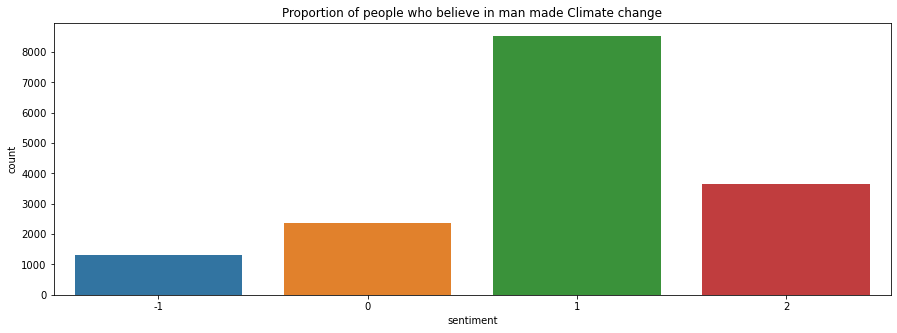

In [36]:
# Ploting the distribution of unique label values.
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="sentiment", data=df_train)
plt.title('Proportion of people who believe in man made Climate change')
plt.style.use('ggplot')
plt.show()

- The `sentiment` shows that the highest proportion of the tweets supports the belief of man-made climate change.

- The is an `imbalance` distribution on our label and that may led our model to `overfit`, therefore  it's important to have a balanced label distribution to get a better performing model.

##### Creating WordCloud for all words we have in our data and creating seperate WordCloud for each sentiment.
##### NOTE: Some of the words/texts that appear on the wordcloud have been tokenized E.g Climate-> Climat. ####
- Sentiment 1 Pro
- Sentiment 2 News
- Sentiment 0 Neutral
- Sentiment -1 Anti

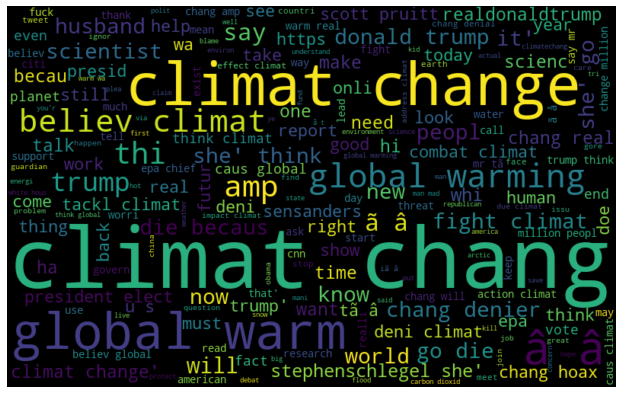

In [37]:
# Creating a wordcloud with all words we have in our message data.
all_words = ' '.join([text for text in df_train['message']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

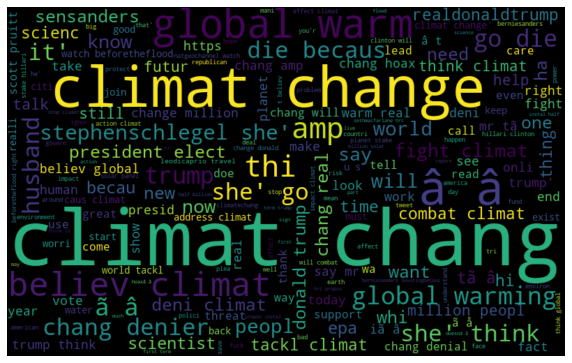

In [38]:
# Creating text for pro-climate change buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

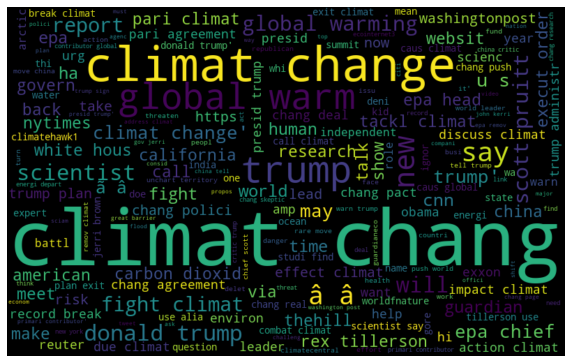

In [39]:
# Creating text for anti-clmate change buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

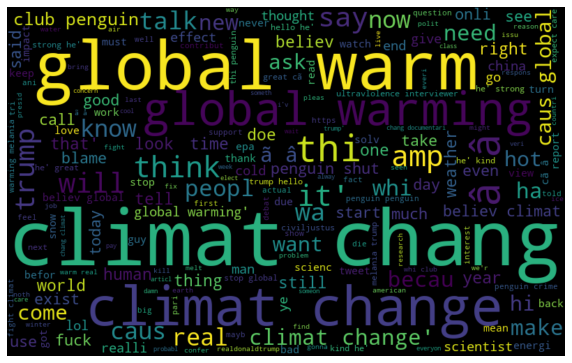

In [40]:
# Creating text from neutral buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

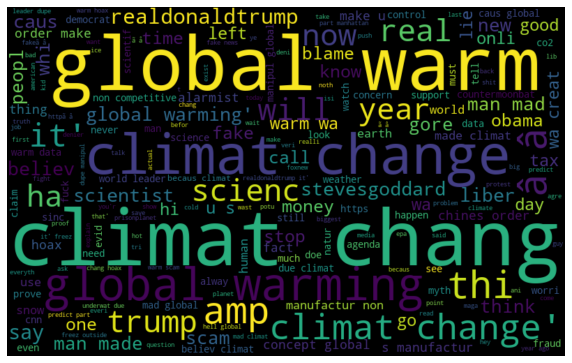

In [41]:
# Creating text from news buzzwords.
normal_words = ' '.join([text for text in df_train['message'][df_train['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.style.use('ggplot')
plt.show()

Creating a function to assist us in extracting all tweets according to their sentiment from our dataset.

In [42]:
# Extracting Tweets from their sentiment
def hashtag_extract(tweet):
    # Creating a list that will hold all hashtags
    hashtags = []
    # Looping through the tweets to find all words that match the hashtag
    for i in tweet:
        ht = re.findall(r"#(\w+)",i)
    # Appending all words to the list which matches the hashtags
        hashtags.append(ht)
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    # Creating a data frame for all hashtags counts
    hashtag_df_train = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df_train = hashtag_df_train.nlargest(15, columns="count")

    return hashtag_df_train

Positive_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])
Negative_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 2])
Neutral_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])
News_tweets = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])
# After the extraction has been done we now view our data to check the count.
News_tweets.head()

,hashtag,count
5,maga,12
11,trump,8
39,parisagr,5
51,climat,5
15,climatechang,4


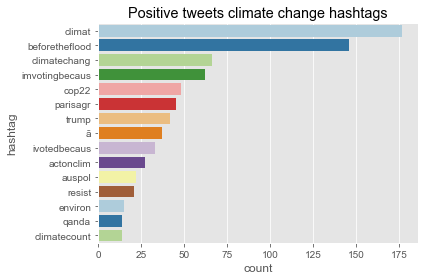

In [43]:
# Plotting the frequent hashtags for pro climate change classes.
sns.barplot(data = Positive_tweets,y = Positive_tweets['hashtag'], x = Positive_tweets['count'], palette=("Paired"))
plt.title('Positive tweets climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

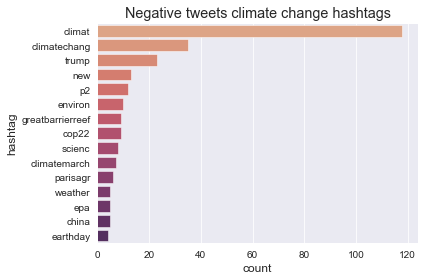

In [44]:
# Plotting the frequent hastags for anti climate change classes.
sns.barplot(data=Negative_tweets,y=Negative_tweets['hashtag'], x=Negative_tweets['count'], palette=("flare"))
plt.title('Negative tweets climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

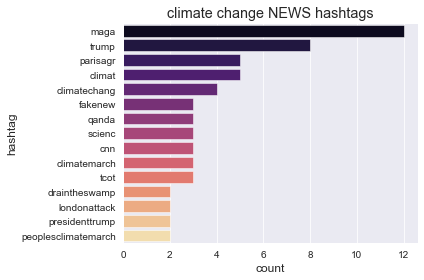

In [45]:
# Plotting the frequent hastags for news climate change classes.
sns.barplot(y= News_tweets['hashtag'], x= News_tweets['count'], palette=("magma"))
plt.title('climate change NEWS hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

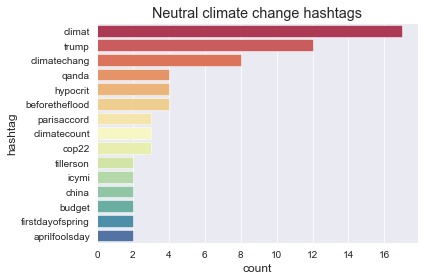

In [46]:
# Plotting the frequent hastags for neutral climate change classes.
sns.barplot(y=Neutral_tweets['hashtag'], x=Neutral_tweets['count'], palette=("Spectral"))
plt.title('Neutral climate change hashtags')
sns.set_style('darkgrid')
plt.tight_layout()

In [47]:
# Extracting Features from cleaned tweets.
new_df = df_train[['message','sentiment']]
len(new_df)

15819

In [48]:
# Extracting Features from cleaned tweets
new_df_test = df_test[['message']]

In [49]:
# Viewing the new datset after preprocess has been done.
new_df.head()

,message,sentiment
0,"polyscimajor epa chief doesn't think carbon dioxid main caus global warm and.. wait, what!?",1
1,it' not like lack evid anthropogen global warm,1
2,@rawstory: research say have three year act climat chang befor it’ too late,2
3,#todayinmaker# wire 2016 wa pivot year the war climat chang,1
4,"@soynoviodetodas: it' 2016, and racist, sexist, climat chang deni bigot lead the polls. #electionnight",1


<a id="four"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1 Downsampling
 Engineering feature balancing labels
In this Section, we will be applying a ``Downsampling`` technique to our labels to see if it will assist in improving the models performance.

- ``Downsampling`` taking a random subset of the majority class small enough to match the number of observations in the minority class.


In [50]:
# Declaring all Sentiments 
Pro = new_df[new_df['sentiment'] == 1]
News = new_df[new_df['sentiment'] == 2]
Neutral = new_df[new_df['sentiment'] == 0]
Anti = new_df[new_df['sentiment'] == -1]

In [51]:
# Downsampling all our sentiment to the minority class which is Anti
Pro_downsampled = resample(Pro,
                        replace=False, # sample without replacement (no need to duplicate observations)
                        n_samples=len(Anti), # match number in minority class
                        random_state=27) # reproducible results

News_downsampled = resample(News,
                        replace=False,
                        n_samples=len(Anti),
                        random_state=27)

Neutral_downsampled = resample(Neutral,
                        replace=False,
                        n_samples=len(Anti),
                        random_state=27)

# Combine downsampled majority class with minority class
downsampled = pd.concat([Pro_downsampled, News_downsampled,
                         Neutral_downsampled, Anti])

# Check new class counts
downsampled['sentiment' ].value_counts()

 1    1296
 2    1296
 0    1296
-1    1296
Name: sentiment, dtype: int64

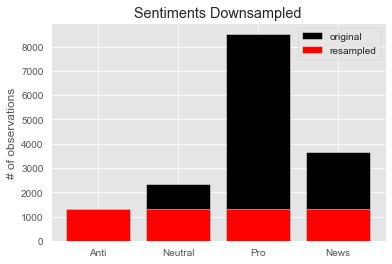

In [52]:
# Adding all the new length values of our sentiments to the variable downsampled_heights
downsampled_heights = [len(downsampled[downsampled['sentiment' ]==1]),
                       len(downsampled[downsampled['sentiment' ]==2]),
                        len(downsampled[downsampled['sentiment' ]==0]),
                        len(downsampled[downsampled['sentiment' ]==-1])]  
# Get all possible labels and plotting

plt.style.use('ggplot')
labels = df_train['sentiment'].unique()
heights = [len(Pro),len(News),len(Neutral),len(Anti)]
plt.bar(labels,heights,color='black')
plt.bar(labels,downsampled_heights,color='red')
plt.xticks(labels,['Pro','News','Neutral','Anti'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.title('Sentiments Downsampled')
plt.show()

Since the ``Pro, Neutral and News`` classes have more observations, we reduce their sizes by taking a small random subset of observations to match the size of the ``Anti`` class. Because this approach reduces the overall size of the dataset, it makes sense to use it only in cases where we have a big collection of data.




After doing some analysis in our dataset we now prepare our data for trying different algorithms and see which can achieve a higher accurate, precision and F1 score.


### 5.2 Vectorization
- Vectorizing data this will convert text data into numerical dtype.
- Splitting data accordingly for training and predictions on our models.
- gonna be using TfidfVectorizer to change text into vectors.

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [53]:
# Declaring our TFIDF variable to convert text data into vectors. 
vec = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words='english')

In [54]:
# Creating targets and features dataset.

# Target
y = new_df['sentiment']

# Features
X = new_df['message']

# Converting text data into vectors as models can process only numerical.
X_vec = vec.fit_transform(X)

# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.01,
                                                    random_state=42, stratify=y)

In [55]:
# Copying the test data to have original untouched.
new_df_test = df_test['message']

In [56]:
# Converting text data into vectors as models can process only numerical.
vec_test = vec.transform(new_df_test)

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 6.1 Logistic Regrission Classifier

In [57]:
# Creating models.

# Training LogisticRegression to our data.
lr = LogisticRegression(C=10, multi_class='ovr', random_state=220,
                        max_iter=5, solver='saga')

lr.fit(X_train , y_train)

# Predictions for Logistic model using X_test 
y_pred_lr = lr.predict(X_test)

# Declaring metrics to use in evaluating our models performance in Comet
accuracy = (lr.score(X_test, y_test))
f1 = (metrics.f1_score(y_test, y_pred_lr, average='weighted'))
precision = (metrics.precision_score(y_test, y_pred_lr, average="weighted"))

# Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)
# Create dictionaries for the data we want to log in Comet

params = {"random_state": 220,
          "model_type": "lr",
          "vec": "TfidfVectorizer",
          "C": '10',
          'multi_class': 'ovr',
          'max_iter': 5,
          'solver': 'saga',
          "stratify": True
          }
metrics_score = {"f1": f1,
           "accuracy": accuracy,
           "precision": precision
           }

# Logging our dictionaries for Comet
experiment.log_parameters(params)
experiment.log_metrics(metrics_score)

# Ending the experiment for Logistic regression model
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/aed34d80fb2148989f65c18e287b6d45

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/aed34d80fb2148989f65c18e287b6d45
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.7672955974842768
COMET INFO:     f1        : 0.7591548300473465
COMET INFO:     preci

### 6.2 Random Forest Classifier

In [58]:
# Training Random Forest to our data
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train , y_train)

# Predictions for Random forest model 
y_pred_rf = rf.predict(X_test)

# Declaring metrics to use in evaluating our model in Comet
accuracy_rf = (rf.score(X_test, y_test))
f1_rf = (metrics.f1_score(y_test, y_pred_rf, average='weighted'))
precision_rf = (metrics.precision_score(y_test, y_pred_rf, 
                                        average="weighted"))  

# Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)

# Create dictionaries for the data we want to log

params_rf = {"random_state": 42,
          "model_type": "rf",
          "vec": "TfidfVectorizer",
          "n_estimator": 200,
          "max_depth": 15,
          "stratify": True
          }
metrics_score_rf = {"f1": f1_rf,
           "accuracy": accuracy_rf,
           "precision": precision_rf
                }

# Logging our dictionaries for Comet
experiment.log_parameters(params_rf)
experiment.log_metrics(metrics_score_rf)

# Ending the experiment for Random Forest model
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/11d7f0c4b3cd4585ac50a4f9c21c934a

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/11d7f0c4b3cd4585ac50a4f9c21c934a
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.5534591194968553
COMET INFO:     f1        : 0.40667862684119255
COMET INFO:     prec

### 6.3 Support Vector Machine

In [59]:
# Training to our data with SVM
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predictions for Suport Vector model using X_test.
y_pred_svc = svc.predict(X_test)

# Declaring metrics to use in evaluating our models performance in Comet
accuracy_svc = (svc.score(X_test, y_test))
f1_svc = (metrics.f1_score(y_test, y_pred_svc, average='weighted'))
precision_svc = (metrics.precision_score(y_test, y_pred_svc,
                                         average="weighted"))  

# Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)

# Create dictionaries for the data we want to log

params_svc = {"model_type": "svc",
          "vec": "TfidfVectorizer",
          "kernel": "linear"
          }
metrics_score_svc = {"f1": f1_svc,
           "accuracy": accuracy_svc,
           "precision": precision_svc
                }

# Logging our dictionaries for Comet
experiment.log_parameters(params_svc)
experiment.log_metrics(metrics_score_svc)

 # Ending experiment for Support Vector model
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/94a28585515e4305864269479f7408f1

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/94a28585515e4305864269479f7408f1
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.7484276729559748
COMET INFO:     f1        : 0.7295701414016068
COMET INFO:     preci

### 6.4 Decision Tree Classifier

In [60]:
# Training Decision Tree to our data
trees = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=5, random_state=42)
trees.fit(X_train , y_train)

# Predictions for the model 
y_pred_trees = trees.predict(X_test)

# Declaring metrics to use in evaluating our model in Comet
accuracy_trees = (rf.score(X_test, y_test))
f1_trees = (metrics.f1_score(y_test, y_pred_trees, average='weighted'))
precision_trees = (metrics.precision_score(y_test, y_pred_trees,
                                           average="weighted"))  

# Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)

# Create dictionaries for the data we want to log

params_trees = {"random_state": 42,
          "model_type": "trees",
          "vec": "TfidfVectorizer",
          "criterion": "gini",
          "splitter": "best",
          "max_depth": 5,
          "stratify": True
          }
metrics_score_trees = {"f1": f1_trees,
           "accuracy": accuracy_trees,
           "precision": precision_trees
                }

# Logging our dictionaries for Comet
experiment.log_parameters(params_trees)
experiment.log_metrics(metrics_score_trees)

# Ending the experiment for Decision Tree
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/25314f43f95b4668bafede1760af8f17

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/25314f43f95b4668bafede1760af8f17
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.5534591194968553
COMET INFO:     f1        : 0.459916142557652
COMET INFO:     precis

### 6.5 K-Nearest Neighbours Classifier

In [61]:
# Training K-Neighbors Classifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

# Predictions for KNN model using X_test
y_pred_knn = knn.predict_proba(X_test)


# Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)

# Create dictionaries for the data we want to log in Comet
params_knn = {
          "model_type": "knn",
          "vec": "TfidfVectorizer"
          }
metrics_score_knn = {"f1": f1_trees,
           "accuracy": accuracy_trees,
           "precision": precision_trees
                }

# Logging our dictionaries for Comet
experiment.log_parameters(params_knn)
experiment.log_metrics(metrics_score_knn)

# Ending the experiment for K-Neighbors Classifier
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/ad298cf5bdfb478fb00601bec3b57182

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/ad298cf5bdfb478fb00601bec3b57182
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.5534591194968553
COMET INFO:     f1        : 0.459916142557652
COMET INFO:     precis

### 6.6 AdaBoost Classifier

In [62]:
# Training AdaBoost to our data 
ada_cl = AdaBoostClassifier(n_estimators=10, learning_rate=5,
                            algorithm="SAMME.R", random_state=42)
ada_cl.fit(X_train , y_train)

# Predictions for ada_cl model 
y_pred_ada_cl = ada_cl.predict(X_test)

# Declaring metrics to use in evaluating our model in Comet
accuracy_ada_cl = (ada_cl.score(X_test, y_test))
f1_ada_cl = (metrics.f1_score(y_test, y_pred_ada_cl, average='weighted'))
precision_ada_cl = (metrics.precision_score(y_test, y_pred_ada_cl,
                                            average="weighted"))  

# # Create an experiment on comet using our api key
experiment = Experiment(
    api_key="ya51pMeun2GaueMc31T8eAwcU",
    project_name="cb4-clean-data",
    workspace="madlophasiyanda-gmail-com",
)

# Create dictionaries for the data we want to log

params_ada_cl = {"random_state": 42,
          "model_type": "ada_cl",
          "vec": "TfidfVectorizer",
          "learning_rate": "5",
          "algorithm": "SAMME.R",
          "stratify": True
          }
metrics_score_ada_cl = {"f1": f1_ada_cl,
           "accuracy": accuracy_ada_cl,
           "precision": precision_ada_cl,
                }

# Logging our dictionaries for Comet
experiment.log_parameters(params_ada_cl)
experiment.log_metrics(metrics_score_ada_cl)

# Ending the experiment for AdaBoost Classifier
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/645904d2c7594cc5ae26ebbb198be3bb

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/madlophasiyanda-gmail-com/cb4-clean-data/645904d2c7594cc5ae26ebbb198be3bb
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.5408805031446541
COMET INFO:     f1        : 0.3797201899627776
COMET INFO:     preci

### 6.7 Creating a csv file for kaggle submission
- We gonna be using the test data to predict for kaggle submission

In [63]:
# Predictions using test data.
y_pred_lr2 = lr.predict(vec_test)

In [64]:
# Generating the csv file for kaggle submission
df_edit = pd.DataFrame(y_pred_lr2, columns=['sentiment'])
output = pd.DataFrame({"tweetid": df_test['tweetid'].reset_index(drop=True)})
submissionF = output.join(df_edit)
submissionF['sentiment'] = df_edit.values
submissionF.to_csv("subFile(Logistic2).csv", index=False)
# Printing to see how are csv matches the sample we are given on kaggle
print(submissionF)

       tweetid  sentiment
0       169760          1
1        35326          0
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          2
10544   867455          0
10545   470892          2

[10546 rows x 2 columns]


### 6.8 Creating pickle files for all our model to use in our Web app.

In [65]:
# Creating a pickle file 
save_path = './Support_Vector.pkl'
pickle.dump(svc, open(save_path,'wb'))

In [66]:
# Creating a pickle file
save_path = './Decision_Tree.pkl'
pickle.dump(trees, open(save_path,'wb'))

In [67]:
# Creating a pickle file 
save_path = './K-Neighbors.pkl'
pickle.dump(knn, open(save_path,'wb'))

In [68]:
# Creating a pickle file
save_path = './AdaBoost.pkl'
pickle.dump(ada_cl, open(save_path,'wb'))

In [69]:
# Creating a pickle file for our Vectorizer
save_path = './Vectorizer.pkl'
pickle.dump(vec, open(save_path,'wb'))

In [70]:
# Creating a pickle file for our model
save_path = './lr_regression_base_model.pkl'
pickle.dump(lr, open(save_path,'wb'))

<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 7.1 Model Comparison

In this section, we compare each model to determine which of the six performs best. We start by displaying the classification reports of each model.

In [71]:
# Logistic Regression Classification Report.
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          -1       0.57      0.31      0.40        13
           0       0.62      0.62      0.62        24
           1       0.80      0.86      0.83        86
           2       0.81      0.81      0.81        36

    accuracy                           0.77       159
   macro avg       0.70      0.65      0.67       159
weighted avg       0.76      0.77      0.76       159



In [72]:
# Random Forest Classification Report.
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.00      0.00      0.00        24
           1       0.55      1.00      0.71        86
           2       1.00      0.06      0.11        36

    accuracy                           0.55       159
   macro avg       0.39      0.26      0.20       159
weighted avg       0.52      0.55      0.41       159



In [73]:
# Support Vector Machine Classification Report.
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

          -1       0.67      0.31      0.42        13
           0       0.71      0.42      0.53        24
           1       0.73      0.93      0.82        86
           2       0.86      0.69      0.77        36

    accuracy                           0.75       159
   macro avg       0.74      0.59      0.63       159
weighted avg       0.75      0.75      0.73       159



In [74]:
# Decision Tree Classification Report.
print(classification_report(y_test, y_pred_trees))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.38      0.12      0.19        24
           1       0.56      0.91      0.69        86
           2       0.50      0.17      0.25        36

    accuracy                           0.55       159
   macro avg       0.36      0.30      0.28       159
weighted avg       0.47      0.55      0.46       159



In [75]:
# AdaBoost Classification Report.
print(classification_report(y_test, y_pred_ada_cl))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        13
           0       0.00      0.00      0.00        24
           1       0.54      1.00      0.70        86
           2       0.00      0.00      0.00        36

    accuracy                           0.54       159
   macro avg       0.14      0.25      0.18       159
weighted avg       0.29      0.54      0.38       159



Running all Classifiers at once. 

In [76]:
# Creating a list of all the names of our models.
names = ['Logistic Regression', 'Random Forest', 'Support Vector',
         'Decision Tree', 'K-Neighbors', 'AdaBoost']

# Declaring all models we are comparing.
models_cl = [LogisticRegression(C=10, multi_class='ovr',
                                random_state=220,
                                max_iter=5, solver='saga'),
            RandomForestClassifier(n_estimators=200,
                                   max_depth=15, random_state=42),
            SVC(kernel='linear'),
            DecisionTreeClassifier(criterion="gini",
                                   splitter="best",
                                   max_depth=5, random_state=42),
            KNeighborsClassifier(3),
            AdaBoostClassifier(n_estimators=10, learning_rate=5,
                               algorithm="SAMME.R", random_state=42)
             ]

# Creating an empty list where we gonna append all our model performances.
results = []

# Creating 3 dictionaries where 1 will hold the names of all our models,
models = {}

# 2 will hold the confusion matrix for all models,
confusion = {}

# 3 will hold the classification report for all models.
class_report = {}

# We now create a loop to iterate simultaneously to our models and the title names.
for name, clf in zip(names, models_cl):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    # Predictions for all models.
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    # Metrics to help us see which model performs best.
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,
                                        average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,
                                     average='weighted')
    
    f1        = metrics.f1_score(y_train, y_pred,
                                 average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,
                                 average='weighted')    
    
    # Save the results to dictionaries.
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall,
                    f1, f1_test, run_time.best])

# Creating a dataframe with results with how our models have performed using the metrics.
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall',
                                         'F1 Train', 'F1 Test',
                                         'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Support Vector model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting K-Neighbors model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [77]:
# Print the results of all models.
results

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.930013,0.930627,0.930013,0.929393,0.759155,0.202483
Random Forest,0.556897,0.756773,0.556897,0.416133,0.406679,2.924085
Support Vector,0.893934,0.898134,0.893934,0.890715,0.729570,88.202814
Decision Tree,0.583206,0.615309,0.583206,0.509883,0.459916,0.334943
K-Neighbors,0.954917,0.956811,0.954917,0.955232,0.390216,0.004744
AdaBoost,0.539208,0.570466,0.539208,0.378014,0.379720,0.361007


<AxesSubplot:xlabel='Classifier'>

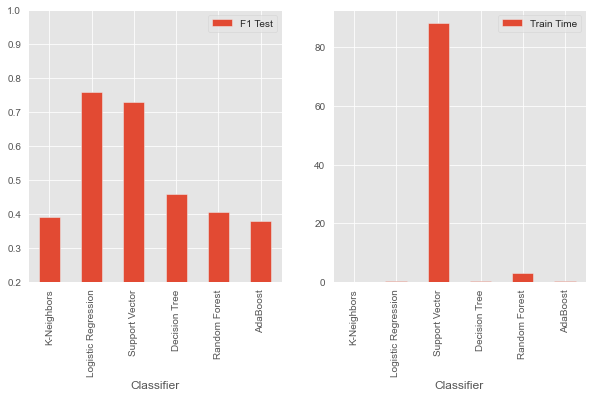

In [78]:
# Let's plot the performance of all our models.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.style.use('ggplot')
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### 7.2 Model Selection

Model selected based on performance is Logistic Regression.

<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


From the graph above and classification reports, we can see that `Logistic Regression` and Support Vector Machine variants perform almost similarly and post good metric scores. On the other hand, our K-Neighbors and AdaBoost performed by far the worst. Taking train time into account it has been observed that Support Vector Machine takes much longer to train than `Logistic Regression`, seeing that they both perform pretty well on the training data. These results were achieved by using the trail and error method for hypertuning our models. Since our data has a multi-class set, `Logistic Regression` model has the capacity to accommodate multiple classes, even though `logistic regression` is a binary classification model. One way it does this is through a One vs Rest scheme (i.e. one class vs the rest of the classes). This means that we split the multi-class classification problem into multiple binary classification problems. This is achieved by using the hyperparameter multi_class = 'ovr' and we have chosen `Logistic Regression as our best model` due its performance.

 More observation where done with both clean and unclean data. We were able to achieve higher accuracy with unclean data, after doing all the pre-processing in ensuring our data is clean with no noise, special characters, tokenized and stemmed data and the sentiment data distribution being balanced to assist when training our models. We still could not improve the accuracy using clean data. As a result using `Logistic Regression` with unclean data gave better predictions and accuracy.